In [3]:
import chess
import chess.polyglot
import chess.pgn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter


pgn = open("lichess_db_standard_rated_2014-12.pgn")

for i in range(3):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break
    print(f"partie {i + 1}:\n")
    print(game)
    print("\n" + "-" * 50 + "\n")

partie 1:

[Event "Rated Bullet game"]
[Site "https://lichess.org/kkoeqcF0"]
[Date "????.??.??"]
[Round "?"]
[White "carlsen89"]
[Black "goltrpoat"]
[Result "0-1"]
[UTCDate "2014.11.30"]
[UTCTime "23:00:03"]
[WhiteElo "2070"]
[BlackElo "1918"]
[WhiteRatingDiff "-15"]
[BlackRatingDiff "+16"]
[ECO "B18"]
[Opening "Caro-Kann Defense: Classical Variation"]
[TimeControl "60+0"]
[Termination "Normal"]

1. e4 c6 2. d4 d5 3. Nd2 dxe4 4. Nxe4 Bf5 5. Ng3 Bg6 6. Nf3 Nd7 7. Bd3 Ngf6 8. c4 e6 9. Qc2 Be7 10. Bg5 O-O 11. O-O b5 12. cxb5 cxb5 13. Bxb5 Bxc2 0-1

--------------------------------------------------

partie 2:

[Event "Rated Blitz tournament https://lichess.org/tournament/X5BO0Amj"]
[Site "https://lichess.org/IqsDiXIt"]
[Date "????.??.??"]
[Round "?"]
[White "nunutsu"]
[Black "sergeblanc"]
[Result "0-1"]
[UTCDate "2014.11.30"]
[UTCTime "23:00:40"]
[WhiteElo "1406"]
[BlackElo "1567"]
[WhiteRatingDiff "-6"]
[BlackRatingDiff "+7"]
[ECO "A40"]
[Opening "Horwitz Defense"]
[TimeControl "300+0"]


In [4]:
with open("lichess_db_standard_rated_2014-12.pgn") as f:
    nb_parties = sum(1 for line in f if line.startswith("[Event "))
print(f"Nombre total de parties : {nb_parties}")


Nombre total de parties : 1350176


Calculer l'entropie sur distib 
Gaussienne 
Plus proche voisin (Obama)

In [ ]:
array = []
for _ in range(20000):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break
    diff = int(game.headers.get("WhiteRatingDiff", 999))
    if( -10 < diff < 10):
        array.append(int(game.headers.get("WhiteElo")))


    
mean_array = np.mean(array)
std_array = np.std(array)
#x = scipy.stats.shapiro(array)
#print(x.pvalue)
array.sort()

x = np.linspace(min(array), max(array), 1000)
y = scipy.stats.norm.pdf(x, mean_array, std_array)

plt.hist(array, bins=200, density=True, color='blue', label="Distribution de la base")
plt.plot(x, y, color='coral', linewidth=2, label="Gaussienne théorique")

plt.title('Distribution des Elos', fontsize=12)
plt.xlabel('Elo')
plt.ylabel('Densité')
plt.grid()
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

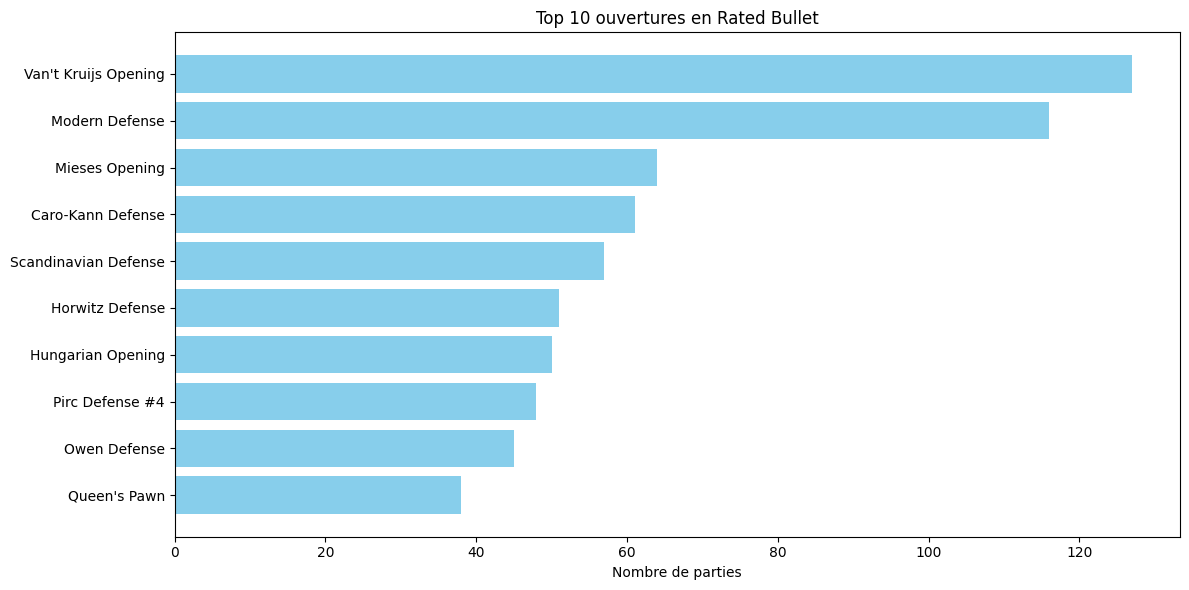

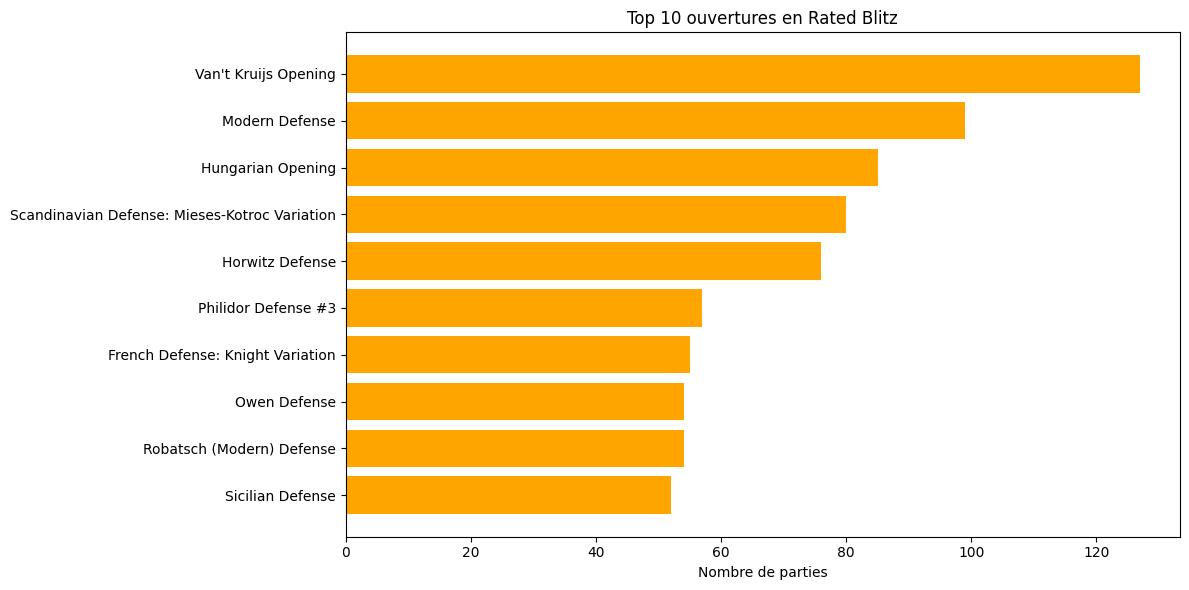

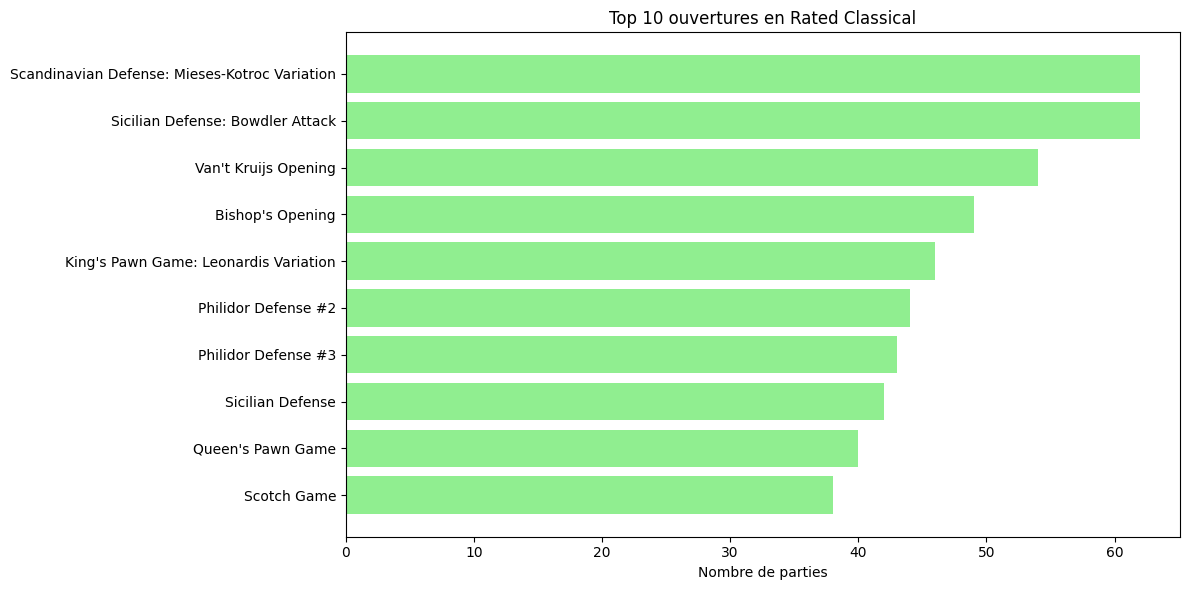

In [8]:
bullet_stats = Counter()
blitz_stats = Counter()
classical_stats = Counter()
blitz_stats_ECO = Counter()

for _ in range(10000):
    game = chess.pgn.read_game(pgn)
    if (game.headers.get("Opening") == "?"):
        continue
    if game is None:
        break

    event = game.headers.get("Event", "")
    opening = game.headers.get("Opening", "Unknown")



    if "Rated Bullet" in event:
        bullet_stats[opening] += 1
    elif "Rated Blitz" in event:
        blitz_stats[opening] += 1
    elif "Rated Classical" in event:
        classical_stats[opening] += 1

def plot_openings(stats, title, color):
    top_openings = stats.most_common(10)
    openings = [item[0] for item in top_openings]
    counts = [item[1] for item in top_openings]

    plt.figure(figsize=(12, 6))
    plt.barh(openings[::-1], counts[::-1], color=color)
    plt.xlabel("Nombre de parties")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_openings(bullet_stats, "Top 10 ouvertures en Rated Bullet", "skyblue")
plot_openings(blitz_stats, "Top 10 ouvertures en Rated Blitz", "orange")
plot_openings(classical_stats, "Top 10 ouvertures en Rated Classical", "lightgreen")

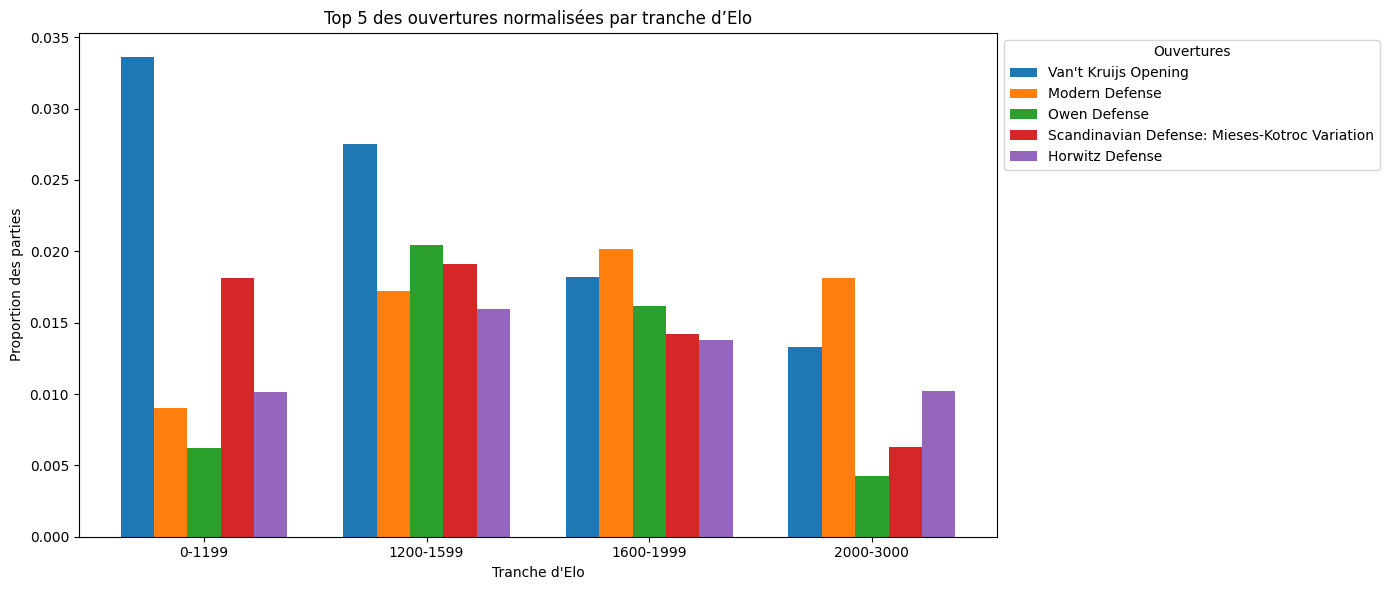

In [9]:
elo_ranges = [(0, 1199), (1200, 1599), (1600, 1999), (2000, 3000)]
elo_labels = [f"{low}-{high}" for low, high in elo_ranges]
elo_opening_stats = {label: Counter() for label in elo_labels}

for _ in range(200000):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break

    try:
        white_elo = int(game.headers.get("WhiteElo", 0))
        black_elo = int(game.headers.get("BlackElo", 0))
        average_elo = (white_elo + black_elo) // 2
        opening = game.headers.get("Opening", "Unknown")
    except:
        continue

    for (low, high), label in zip(elo_ranges, elo_labels):
        if low <= average_elo <= high:
            elo_opening_stats[label][opening] += 1
            break

total_opening_counts = sum(elo_opening_stats.values(), Counter())
top_openings = [opening for opening, _ in total_opening_counts.most_common(5)]

bar_width = 0.15
x = np.arange(len(elo_labels))

plt.figure(figsize=(14, 6))

for i, opening in enumerate(top_openings):
    counts = []
    for label in elo_labels:
        total = sum(elo_opening_stats[label].values())
        if total > 0:
            count = elo_opening_stats[label][opening] / total
        else:
            count = 0
        counts.append(count)

    plt.bar(x + i * bar_width, counts, width=bar_width, label=opening)

plt.xlabel("Tranche d'Elo")
plt.ylabel("Proportion des parties")
plt.title("Top 5 des ouvertures normalisées par tranche d’Elo")
plt.xticks(x + bar_width * 2, elo_labels)
plt.legend(title="Ouvertures", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


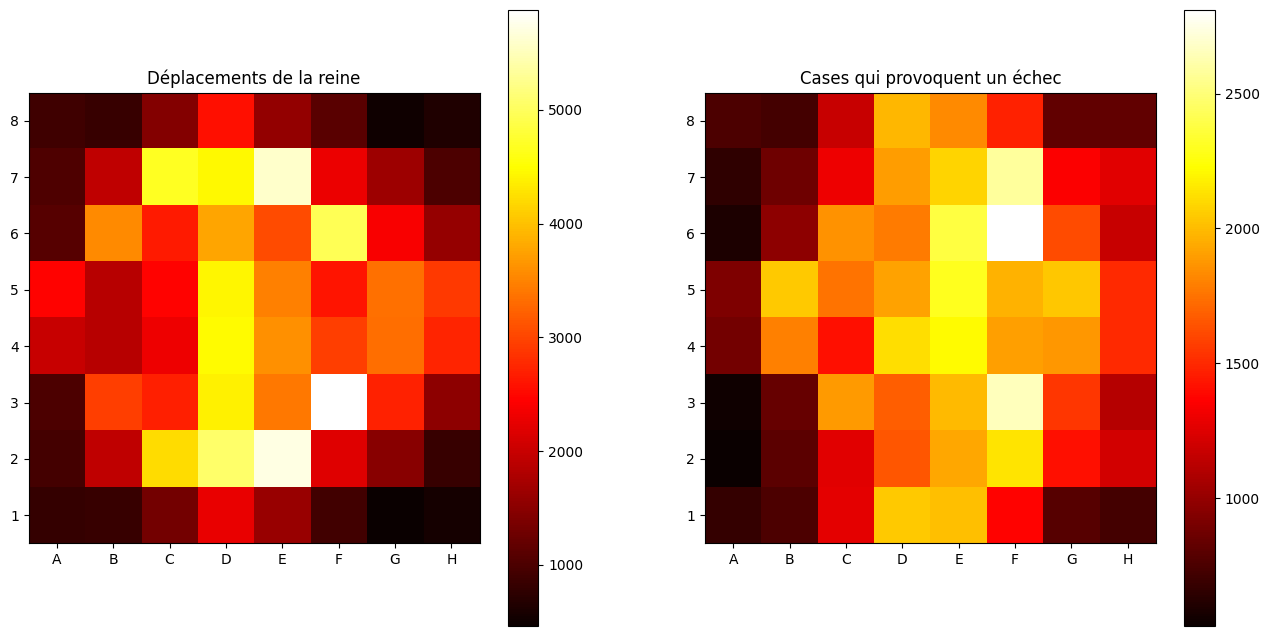

Entropie des cases d'échec : 5.887 bits


In [ ]:
#ON essaie de mesurer la fréquence des coups de Dame et les pièces qui mettent en échecs
#  
queen_moves = Counter()
check_moves = Counter()

for _ in range(20000):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break

    board = game.board()
    for move in game.mainline_moves():
        piece = board.piece_at(move.from_square)
        if piece and piece.piece_type == chess.QUEEN:
            square = move.to_square
            queen_moves[square] += 1
        
        board.push(move)

        if board.is_check():
            check_moves[move.to_square] += 1


board_chess = np.zeros((8,8))
board_chess1 = np.zeros((8,8))


for square, count in queen_moves.items():
    row = chess.square_rank(square)
    column = chess.square_file(square)
    board_chess[7-row, column] = count #Inverse l'axe des rangées pour avoir un échequier avec le blanc en bas

board_chess1 = np.zeros((8,8))

for square, count in check_moves.items():
    row = chess.square_rank(square)
    column = chess.square_file(square)
    board_chess1[7 - row, column] = count #Inverse l'axe des rangées pour avoir un échequier avec le blanc en bas


fig, axs = plt.subplots(1, 2, figsize=(16,8))

im0 = axs[0].imshow(board_chess, cmap="hot", interpolation="nearest")
axs[0].set_title("Déplacements de la reine")
fig.colorbar(im0, ax=axs[0])
axs[0].set_xticks(np.arange(8))
axs[0].set_xticklabels(['A','B','C','D','E','F','G','H'])
axs[0].set_yticks(np.arange(8))
axs[0].set_yticklabels(list(reversed(range(1,9))))

im1 = axs[1].imshow(board_chess1, cmap="hot", interpolation="nearest")
axs[1].set_title("Cases qui provoquent un échec")
fig.colorbar(im1, ax=axs[1])
axs[1].set_xticks(np.arange(8))
axs[1].set_xticklabels(['A','B','C','D','E','F','G','H'])
axs[1].set_yticks(np.arange(8))
axs[1].set_yticklabels(list(reversed(range(1,9))))
plt.show()


On remarque de la case de Qd8 est plus colorée que Qd1, cela vient probablement d'une variante qui est régulièrement joué sur la défense Scandinave ! 